Multivariate Outlier Detection Results:

   Salary  Experience  mahalanobis  outlier
0   50000         2.0     0.637622    False
1   52000         2.2     0.484277    False
2   51000         2.1     0.560131    False
3   49500         1.9     0.648335    False
4   70000         3.5     1.684808    False
5   49000         2.0     0.790915    False
6  100000        10.0     2.843835     True
7   48000         1.8     0.795598    False
8   53000         2.3     0.410971    False
9   75000         4.0     2.066745    False


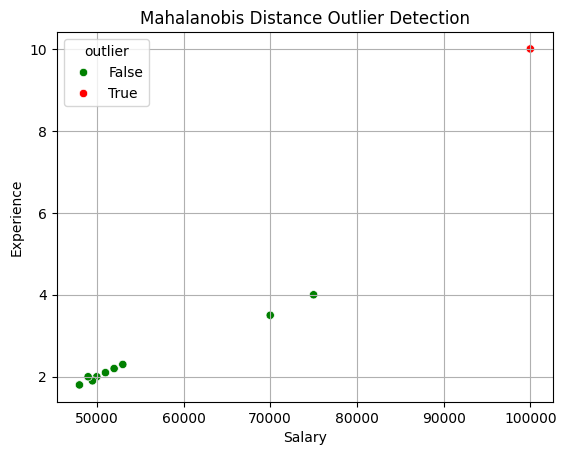

In [1]:
# Question: Multivariate Outlier Detection Using Mahalanobis Distance
# Description: Implement Mahalanobis distance to detect multivariate outliers in a dataset.

import numpy as np
import pandas as pd
from scipy.stats import chi2
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns

# Sample dataset
data = {
    'Salary': [50000, 52000, 51000, 49500, 70000, 49000, 100000, 48000, 53000, 75000],
    'Experience': [2, 2.2, 2.1, 1.9, 3.5, 2, 10, 1.8, 2.3, 4]
}

df = pd.DataFrame(data)

# Compute mean and covariance
x = df.values
mean = np.mean(x, axis=0)
cov_matrix = np.cov(x, rowvar=False)
inv_cov_matrix = np.linalg.inv(cov_matrix)

# Mahalanobis distance calculation
df['mahalanobis'] = [mahalanobis(row, mean, inv_cov_matrix) for row in x]

# Determine threshold (95% confidence level)
threshold = np.sqrt(chi2.ppf(0.95, df=x.shape[1]))
df['outlier'] = df['mahalanobis'] > threshold

# Display results
print("Multivariate Outlier Detection Results:\n")
print(df)

# Visualize
sns.scatterplot(data=df, x='Salary', y='Experience', hue='outlier', palette={True: 'red', False: 'green'})
plt.title('Mahalanobis Distance Outlier Detection')
plt.xlabel('Salary')
plt.ylabel('Experience')
plt.grid(True)
plt.show()
